In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

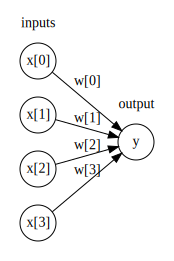

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

Text(0, 0.5, 'relu(x),tanh(x)')

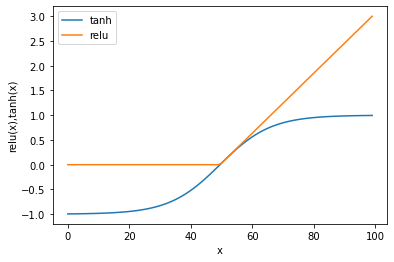

In [3]:
line=np.linspace(-3,3,100)
plt.plot(np.tanh(line),label='tanh')
plt.plot(np.maximum(line,0),label='relu')
plt.legend()
plt.xlabel('x')
plt.ylabel('relu(x),tanh(x)')

Text(0, 0.5, 'Feature 1')

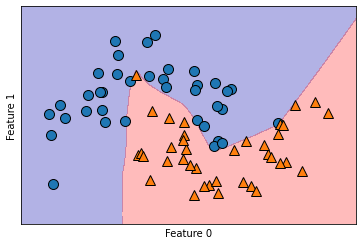

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

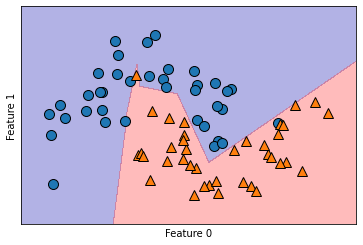

In [5]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

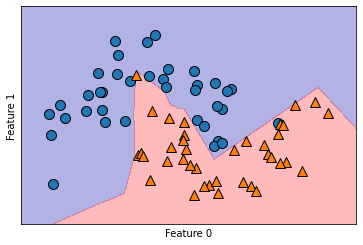

In [6]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

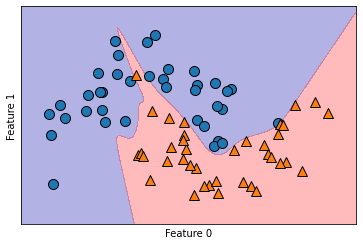

In [7]:
mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,
                 hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

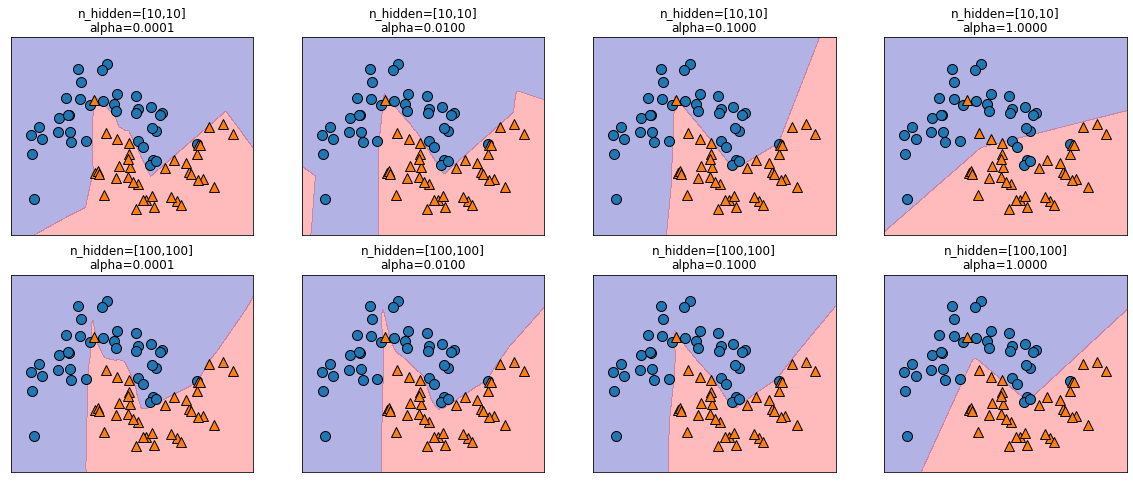

In [8]:
fig,axes=plt.subplots(2,4,figsize=(20,8))

for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,
                         hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                         alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(
        n_hidden_nodes,n_hidden_nodes,alpha))

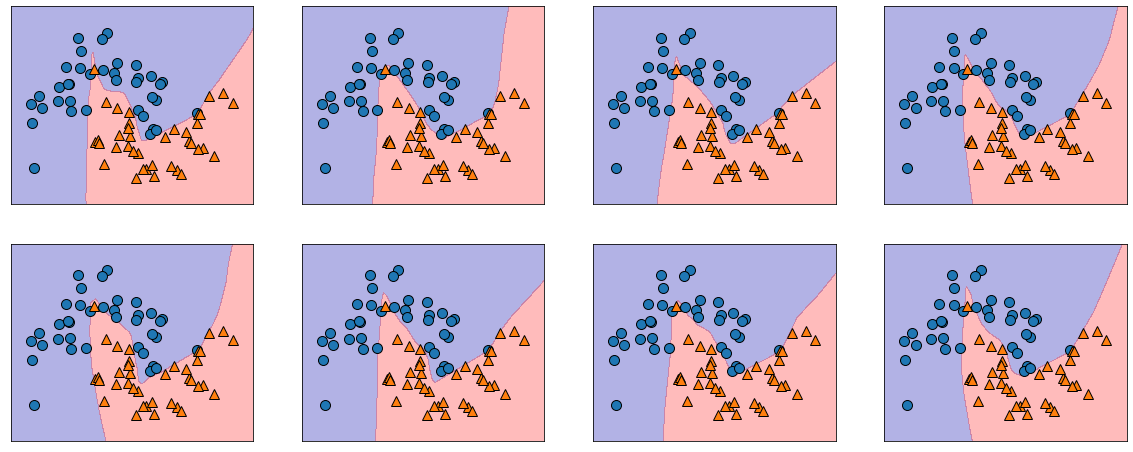

In [9]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)


In [10]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [11]:
print('Cancer data per-feature maxima:\nP{}'.format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
P[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [12]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=0)
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print('Accuracy on training data: {:.2f}'.format(mlp.score(X_train,y_train)))
print('Accuracy on test data: {:.2f}'.format(mlp.score(X_test,y_test)))

Accuracy on training data: 0.94
Accuracy on test data: 0.92


In [13]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


In [14]:
mlp=MLPClassifier(max_iter=100,random_state=0)
mlp.fit(X_train_scaled,y_train)
print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [15]:
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)

mlp.fit(X_train_scaled,y_train)
print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


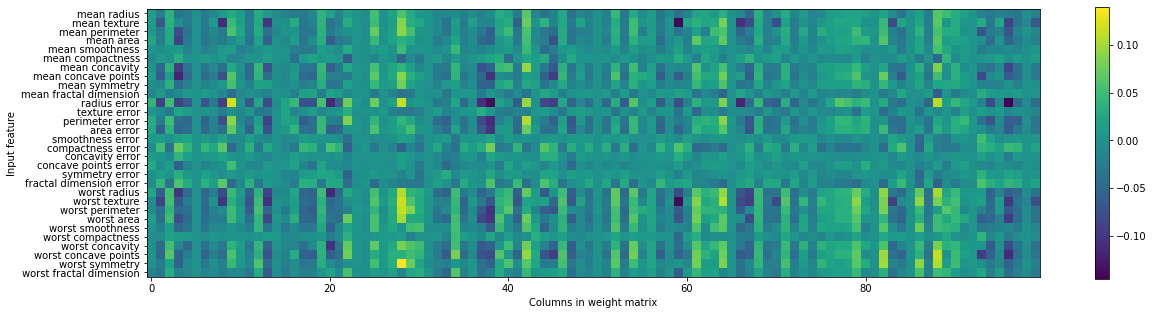

In [16]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X,y=make_circles(noise=0.25,factor=0.5,random_state=1)
y_named=np.array(['blue','red'])[y]
X_train,X_test,y_train_named,y_test_named,y_train,y_test=train_test_split(X,
                                                            y_named,y,random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(random_state=0)

In [18]:
print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [19]:
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [20]:
print('Thresholded decision function: \n{}'.format(
                            gbrt.decision_function(X_test)>0))
print('Prediction:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function: 
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [21]:
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
pred=gbrt.classes_[greater_zero]
print('pred is equal to predictions: {}'.format(np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions: True


In [22]:
decision_function=gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f} maximum: {:.2f}'.format(
                np.min(decision_function),np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


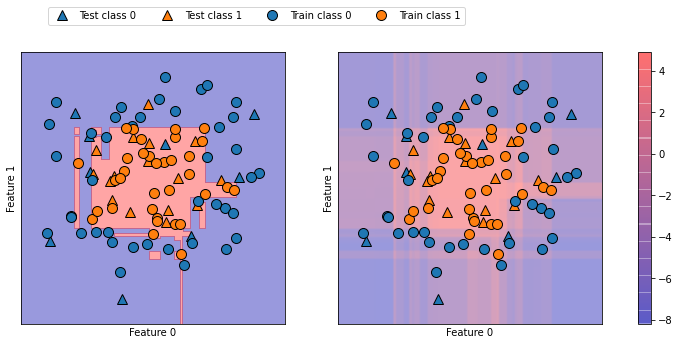

In [23]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,
                                cm=mglearn.cm2)

scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                            markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['Test class 0','Test class 1','Train class 0','Train class 1'],
               ncol=4,loc=(.1,1.1))

In [24]:
print('Shape of probabilities: {}'.format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [25]:
print('Predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test)))

Predicted probabilities:
[[1.57362639e-02 9.84263736e-01]
 [8.45756526e-01 1.54243474e-01]
 [9.81128693e-01 1.88713075e-02]
 [9.74070327e-01 2.59296728e-02]
 [1.35214212e-02 9.86478579e-01]
 [2.50463747e-02 9.74953625e-01]
 [9.99543275e-01 4.56725221e-04]
 [1.61426376e-02 9.83857362e-01]
 [2.48329911e-01 7.51670089e-01]
 [3.20518935e-02 9.67948107e-01]
 [9.98441637e-01 1.55836338e-03]
 [1.35214212e-02 9.86478579e-01]
 [1.98099245e-02 9.80190075e-01]
 [7.68580365e-01 2.31419635e-01]
 [2.50463747e-02 9.74953625e-01]
 [9.84817480e-01 1.51825198e-02]
 [7.73836215e-01 2.26163785e-01]
 [9.80463909e-01 1.95360915e-02]
 [1.73607896e-02 9.82639210e-01]
 [1.61426376e-02 9.83857362e-01]
 [1.61426376e-02 9.83857362e-01]
 [3.41393574e-01 6.58606426e-01]
 [6.30759509e-02 9.36924049e-01]
 [9.34424749e-01 6.55752512e-02]
 [8.66199569e-01 1.33800431e-01]]


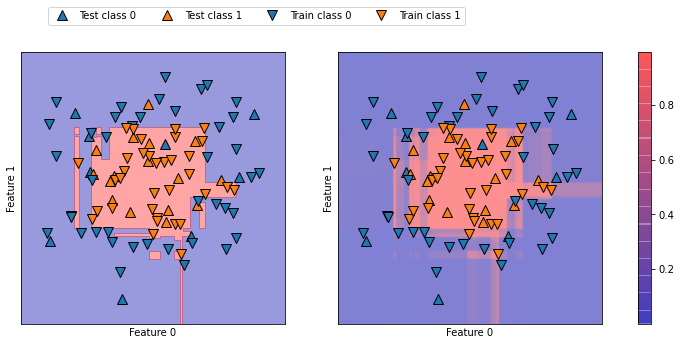

In [26]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,
                                cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],
                            alpha=.5,cm=mglearn.ReBl,function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='v',ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['Test class 0','Test class 1','Train class 0','Train class 1'],
              ncol=4,loc=(.1,1.1))

In [27]:
from sklearn.datasets import load_iris

iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42)

gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [28]:
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6,:]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [29]:
print('Argmax of decision function:\n{}'.format(np.argmax(gbrt.decision_function(
                                                                    X_test),axis=1)))
print('Prediction:\n{}'.format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
named_target=iris.target_names[y_train]
logreg.fit(X_train,named_target)
print('unique classes in training data: {}'.format(logreg.classes_))
print('predictions: {}'.format(logreg.predict(X_test)[:10]))
argmax_dec_func=np.argmax(logreg.decision_function(X_test),axis=1)
print('argmax of decision function: {}'.format(argmax_dec_func[:10]))
print('argmax combined with classes_{}'.format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
